## Reading the data

In [37]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r'MovieGenre.csv', encoding='latin-1')
df=df.head(5000)

In [38]:
import urllib.request
from PIL import Image
from io import BytesIO

## Preprocessing

In [39]:
df.drop(columns=[ 'Imdb Link','IMDB Score',], inplace=True)
df.dropna(inplace=True)
df.head(5)


,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,imdbId,Title,Genre,Poster
0,0,0,0,0,0,0,0,0,0,0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,1,1,1,1,1,1,1,1,1,1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,2,2,2,2,2,2,2,2,2,2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,3,3,3,3,3,3,3,3,3,3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,4,4,4,4,4,4,4,4,4,4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [40]:
df['Genre'] = df['Genre'].str.split('|')

# Get all unique genres
unique_genres = set()
for genres in df['Genre']:
    unique_genres.update(genres)

for genre in unique_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'Genres' column if needed
df.drop('Genre', axis=1, inplace=True)

df.head(5)


,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,Sci-Fi,Short,Animation,Western,Romance,Family,Music,Adventure,Musical,Documentary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0
2,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,1,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,1,1,0,0,0,0


In [41]:
df.isnull().sum() #checking for null values

Unnamed: 0.9    0
Unnamed: 0.8    0
Unnamed: 0.7    0
Unnamed: 0.6    0
Unnamed: 0.5    0
Unnamed: 0.4    0
Unnamed: 0.3    0
Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
imdbId          0
Title           0
Poster          0
War             0
Sport           0
Action          0
Biography       0
Fantasy         0
Horror          0
History         0
Crime           0
Thriller        0
Drama           0
Film-Noir       0
Mystery         0
Comedy          0
Sci-Fi          0
Short           0
Animation       0
Western         0
Romance         0
Family          0
Music           0
Adventure       0
Musical         0
Documentary     0
dtype: int64

In [42]:
#removing the unnecesaary columns such as unnames due to lack of index
for x in df.columns:
    if x != 'imdbId':
        df.drop(columns={x},inplace=True)
    if x=='imdbId':
        break

In [7]:
#filering the only genre columns for plotting
data=df.iloc[:,3:]

## Stacked Bar plor for Genre count

<Figure size 1000x600 with 0 Axes>

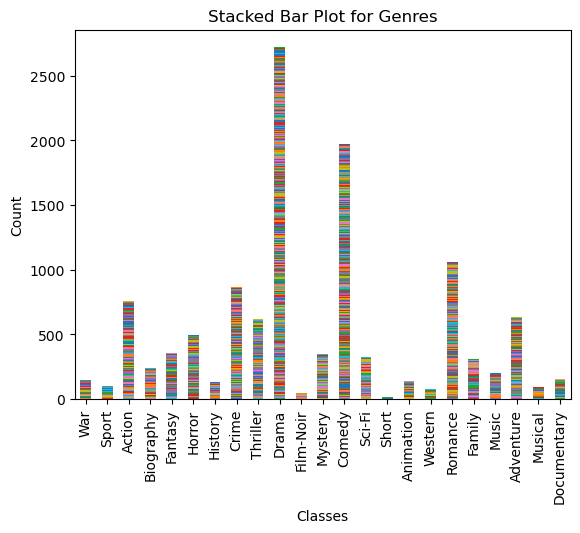

In [43]:
import matplotlib.pyplot as plt


# Stacked Bar Plot
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Removing genres below mean

In [44]:
average_count = data.sum(axis=0).mean()
print(average_count)

513.695652173913


In [45]:
value_counts = df.iloc[:,3:].apply(pd.value_counts)

# Defining a threshold for the value counts
threshold = average_count  # Adjust this threshold based on your criteria

# Identify columns where the value counts are below the threshold
columns_to_drop = value_counts.columns[value_counts.min() < threshold]

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

<Figure size 1000x600 with 0 Axes>

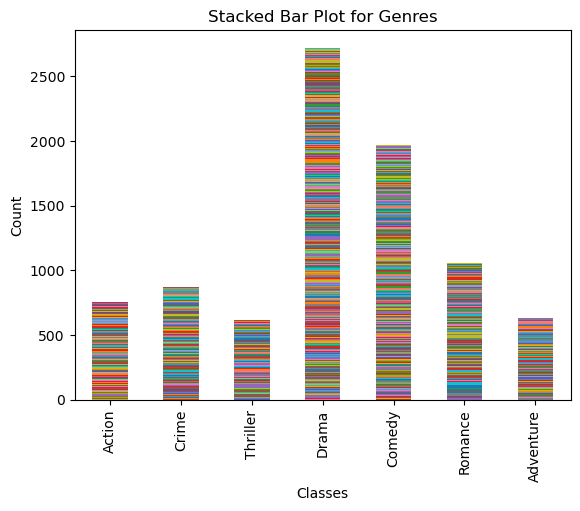

In [46]:
#plotting the genres after removing the ones with less than mean
import matplotlib.pyplot as plt
data=df.iloc[:,3:]

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Model Architecture

In [12]:
import tensorflow as tf
from keras.layers import LeakyReLU

class AlexNet(tf.keras.Model):
    """The AlexNet model Original Architecture."""
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', padding='valid')
        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)

        self.conv2 = tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides=1, activation='relu', padding='same')
        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)

        self.conv3 = tf.keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same')

        self.conv4 = tf.keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same')

        self.conv5 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same')
        self.pool5 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)

        self.flatten = tf.keras.layers.Flatten()

        self.fc1 = tf.keras.layers.Dense(4096, activation='tanh')
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.fc2 = tf.keras.layers.Dense(4096, activation='tanh')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.fc3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.pool2(x)

        x = self.conv3(x)

        x = self.conv4(x)

        x = self.conv5(x)
        x = self.pool5(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x


## Reading the images and preprocessing

In [13]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Function to preprocess image
def preprocess_image(image_path):
    # Open image with url and even made to read images locally without restricting the ability
    try:
      with urllib.request.urlopen(image_path) as response:
          data = response.read()
          img = Image.open(BytesIO(data))
    except:
        img = Image.open(image_path)
    #img = Image.open(image_path)
    # Resize to 32x32 pixels
    img = img.resize((224, 224))
    img = img.convert('RGB')
        # Convert to grayscale
    img = img.convert('L')
        # Convert image to numpy array
    img_array = np.array(img)
        # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
        # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



# Load LeNet model
X = []  # List of preprocessed images
  # List of corresponding genres
for index, row in df.iterrows():
    image_path = row['Poster']  # Assuming 'image_path' contains the file paths of images
    #genre = row[3:]  # Assuming 'genre' contains the genre labels
    try:
      preprocessed_image = preprocess_image(image_path)
      X.append(preprocessed_image)
    except:
       df.drop(df[df['Poster'] == image_path].index, inplace=True)
       pass
    
    




## Training and Splitting the data

In [14]:
#saving the arrays of processed images
y = df.iloc[:,3:].to_numpy()
    #y.append(genre)
print("array denotion")
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

array denotion


In [15]:
#splitting the data with 80:20 ratio
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split

print("splitting")
# 2. Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=True)

splitting


In [16]:
y_train.shape[1]

7

### Expermental Analysis

In [18]:
from tensorflow.keras import layers, models, optimizers
print("model")

num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=15, batch_size=16,validation_data=(X_val, y_val))
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 116s 573ms/step - accuracy: 0.3119 - loss: 6.5544 - val_accuracy: 0.5063 - val_loss: 3.9591
Epoch 2/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 119s 605ms/step - accuracy: 0.3594 - loss: 3.8537 - val_accuracy: 0.3185 - val_loss: 4.5589
Epoch 3/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 122s 621ms/step - accuracy: 0.3490 - loss: 4.1437 - val_accuracy: 0.5063 - val_loss: 3.6371
Epoch 4/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 126s 641ms/step - accuracy: 0.3250 - loss: 4.2169 - val_accuracy: 0.3185 - val_loss: 4.6001
Epoch 5/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 118s 599ms/step - accuracy: 0.3181 - loss: 4.2157 - val_accuracy: 0.5063 - val_loss: 4.3315
Epoch 6/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 120s 611ms/step - accuracy: 0.3243 - loss: 3.9172 - val_accuracy: 0.3185 - val_loss: 3.7108
Epoch 7/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 117s 594ms/step - accuracy: 0.3531 - loss: 3.8413 - val_accuracy: 0.0038 - val_loss: 3.4048
Epoch 8/15
197/1

In [19]:
from tensorflow.keras import layers, models, optimizers
print("model")
num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 120s 601ms/step - accuracy: 0.2991 - loss: 8.2377 - val_accuracy: 0.3185 - val_loss: 3.6579
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 120s 609ms/step - accuracy: 0.3760 - loss: 4.0893 - val_accuracy: 0.5063 - val_loss: 3.9469
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 118s 599ms/step - accuracy: 0.3553 - loss: 4.3679 - val_accuracy: 0.3185 - val_loss: 4.1379
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 118s 599ms/step - accuracy: 0.3484 - loss: 4.5614 - val_accuracy: 0.3185 - val_loss: 5.8456
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 117s 595ms/step - accuracy: 0.3323 - loss: 4.1995 - val_accuracy: 0.3185 - val_loss: 4.2726
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.3225 - loss: 4.3953
Validation accuracy: 0.3185279071331024


In [20]:
from tensorflow.keras import layers, models, optimizers
print("model")
num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 92s 465ms/step - accuracy: 0.3278 - loss: 3.4070 - val_accuracy: 0.3185 - val_loss: 3.5967
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 90s 459ms/step - accuracy: 0.3972 - loss: 3.5291 - val_accuracy: 0.5063 - val_loss: 3.4829
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 94s 478ms/step - accuracy: 0.3681 - loss: 3.4837 - val_accuracy: 0.3185 - val_loss: 3.5883
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 92s 467ms/step - accuracy: 0.3645 - loss: 3.5238 - val_accuracy: 0.3185 - val_loss: 3.5562
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 91s 461ms/step - accuracy: 0.4059 - loss: 3.5878 - val_accuracy: 0.3185 - val_loss: 4.2824
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.3225 - loss: 4.5511
Validation accuracy: 0.3185279071331024


In [17]:
from tensorflow.keras import layers, models, optimizers
print("model")
num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=5, batch_size=64,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.1920 - loss: 18.3641 - val_accuracy: 0.1942 - val_loss: 3.7375
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.3200 - loss: 3.3925 - val_accuracy: 0.3845 - val_loss: 3.3214
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3725 - loss: 3.2725 - val_accuracy: 0.3845 - val_loss: 3.5721
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.3258 - loss: 3.4273 - val_accuracy: 0.1942 - val_loss: 3.2338
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.2915 - loss: 3.4192 - val_accuracy: 0.1942 - val_loss: 3.7156
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.1912 - loss: 3.8073
Validation accuracy: 0.19416244328022003


In [18]:
from tensorflow.keras import layers, models, optimizers
print("model")

num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=5, batch_size=64,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.3883 - loss: 3.2700 - val_accuracy: 0.3845 - val_loss: 3.1359
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.3772 - loss: 3.4851 - val_accuracy: 0.3845 - val_loss: 3.4537
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3341 - loss: 3.4767 - val_accuracy: 0.3020 - val_loss: 3.6595
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3574 - loss: 3.4326 - val_accuracy: 0.3845 - val_loss: 3.8034
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3369 - loss: 3.4170 - val_accuracy: 0.3845 - val_loss: 3.6837
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.3675 - loss: 3.8659
Validation accuracy: 0.38451775908470154


### Accuracy Meterics and More Expermental Analysis

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step


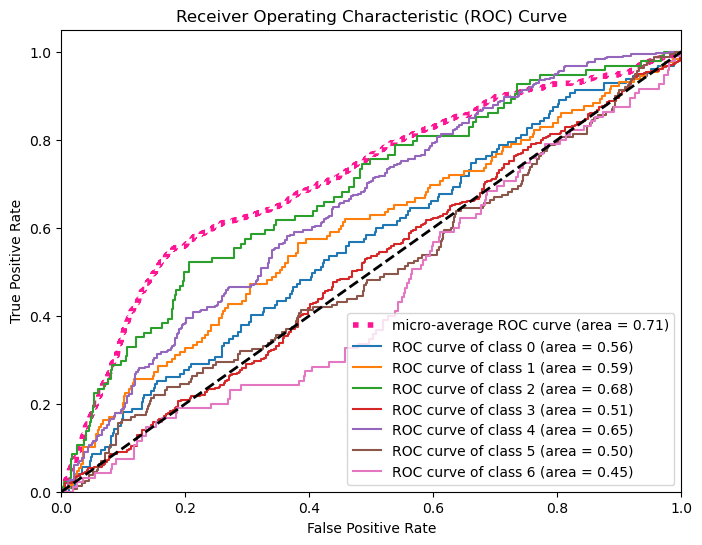

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Get model predictions
y_pred = alexnet_model.predict(X_val)

# 2. Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Compute confusion matrix
genres= df.iloc[:,3:].columns.to_list()
y_true_labels = np.argmax(y_val, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# print("Confusion Matrix:")
# print(conf_matrix)


In [27]:
from tensorflow.keras import layers, models, optimizers
print("model")

num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.2428 - loss: 11.8710 - val_accuracy: 0.3845 - val_loss: 3.3330
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.3788 - loss: 3.3708 - val_accuracy: 0.1942 - val_loss: 3.4603
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.3114 - loss: 3.4501 - val_accuracy: 0.3845 - val_loss: 3.1830
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3606 - loss: 3.2033 - val_accuracy: 0.1942 - val_loss: 3.2075
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.2962 - loss: 3.5348 - val_accuracy: 0.3845 - val_loss: 3.2819
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.3510 - loss: 3.3440 - val_accuracy: 0.3845 - val_loss: 3.3725
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3079 - loss: 3.5317 - val_accuracy: 0.1942 - val_loss: 3.8873
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc

In [29]:
from tensorflow.keras import layers, models, optimizers
print("model")

num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=25, batch_size=64,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.2017 - loss: 16.3879 - val_accuracy: 0.1942 - val_loss: 3.2103
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.2735 - loss: 3.2830 - val_accuracy: 0.3845 - val_loss: 3.2133
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3409 - loss: 3.2833 - val_accuracy: 0.3845 - val_loss: 3.5977
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3074 - loss: 3.4916 - val_accuracy: 0.3845 - val_loss: 3.4119
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3479 - loss: 3.5116 - val_accuracy: 0.1942 - val_loss: 3.3029
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.2919 - loss: 3.4404 - val_accuracy: 0.3845 - val_loss: 3.9349
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3489 - loss: 3.4705 - val_accuracy: 0.3845 - val_loss: 3.8756
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accur

In [36]:
from tensorflow.keras import layers, models, optimizers
print("model")

num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.0001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=25, batch_size=64,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 988ms/step - accuracy: 0.0599 - loss: 3.3049 - val_accuracy: 0.2881 - val_loss: 3.3272
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3462 - loss: 3.3115 - val_accuracy: 0.3807 - val_loss: 3.3013
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.3909 - loss: 3.2956 - val_accuracy: 0.3845 - val_loss: 3.2738
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.3900 - loss: 3.2613 - val_accuracy: 0.3845 - val_loss: 3.2437
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3913 - loss: 3.2262 - val_accuracy: 0.3845 - val_loss: 3.2094
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.3919 - loss: 3.2200 - val_accuracy: 0.3845 - val_loss: 3.1701
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.3796 - loss: 3.1414 - val_accuracy: 0.3845 - val_loss: 3.1274
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - ac

In [28]:
from tensorflow.keras import layers, models, optimizers
print("model")
num_classes = y_train.shape[1]  # Example number of classes
alexnet_model = AlexNet(num_classes)
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.001)
alexnet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_val, y_val))
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)



model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.2391 - loss: 3.2814 - val_accuracy: 0.3845 - val_loss: 3.0885
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3829 - loss: 3.4114 - val_accuracy: 0.1168 - val_loss: 4.8150
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.2732 - loss: 3.8869 - val_accuracy: 0.3845 - val_loss: 3.9958
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3684 - loss: 3.3797 - val_accuracy: 0.1942 - val_loss: 3.7877
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.3462 - loss: 3.4023 - val_accuracy: 0.1954 - val_loss: 3.4857
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3564 - loss: 3.3863 - val_accuracy: 0.3845 - val_loss: 3.2240
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3706 - loss: 3.3185 - val_accuracy: 0.3845 - val_loss: 3.7225
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accura

In [ ]:
print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = alexnet_model.fit(X_train, y_train, epochs=5, batch_size=32,validation_data=(X_val, y_val), shuffle=True)
#accuracy epochs=5, batch_size=16, 0.532313883304596
print("eval")
# 6. Evaluate the model
loss, accuracy = alexnet_model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

In [34]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have already imported necessary libraries and defined your model

# Define the number of folds
k = 4  # You can choose any value you want

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store validation accuracies for each fold
validation_accuracies = []

print("K-fold cross-validation")

# Iterate over each fold
for fold_index, (train_indices, val_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold_index + 1}/{k}")

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X[train_indices], X[val_indices]
    y_train_fold, y_val_fold = y[train_indices], y[val_indices]

    # Define your model architecture
    num_classes = y_train.shape[1]
    alexnet_model = AlexNet(num_classes)

    # Compile the model
    alexnet_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

    # Train the model
    history = alexnet_model.fit(X_train_fold, y_train_fold, epochs=3, batch_size=16, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the validation set for this fold
    _, accuracy = alexnet_model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(accuracy)

# Calculate and print the average validation accuracy over all folds
avg_validation_accuracy = np.mean(validation_accuracies)
print("Average validation accuracy:", avg_validation_accuracy)


K-fold cross-validation
Fold 1/4
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 175s 5s/step - accuracy: 0.2059 - loss: 17.9005 - val_accuracy: 0.2650 - val_loss: 6.2933
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 187s 5s/step - accuracy: 0.2537 - loss: 4.9768 - val_accuracy: 0.2650 - val_loss: 4.2953
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.2630 - loss: 3.9259 - val_accuracy: 0.2650 - val_loss: 4.3636
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2711 - loss: 4.4808
Fold 2/4
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.2730 - loss: 9.3915 - val_accuracy: 0.3050 - val_loss: 3.6265
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 0.2368 - loss: 4.3169 - val_accuracy: 0.3050 - val_loss: 3.6162
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.2622 - loss: 4.7112 - val_accuracy: 0.3050 - val_loss: 3.7633
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.3133 - loss: 3.6922
Fold 3/4
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step 

In [32]:
def show(preprocessed_image):
    import matplotlib.pyplot as plt
    processed_image = tf.image.convert_image_dtype(preprocessed_image, tf.uint8)

    # Convert the processed image tensor to NumPy array
    processed_image_np = processed_image.numpy()

    # Plot the processed image using Matplotlib
    plt.imshow(processed_image_np) 

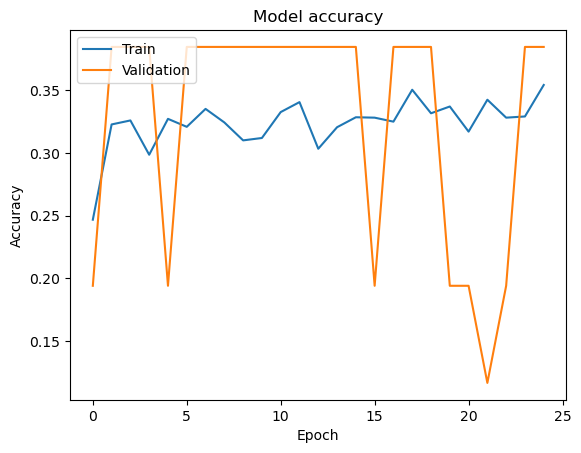

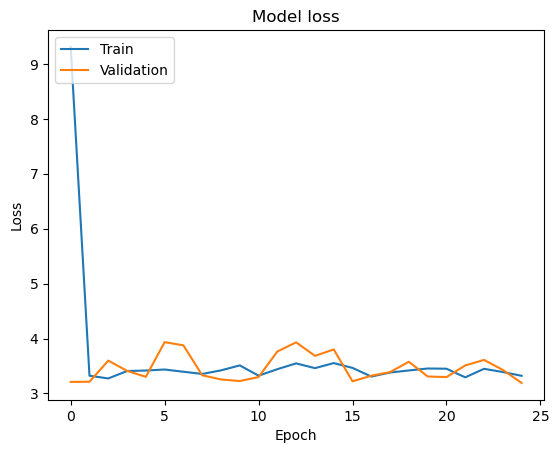

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### AUC-ROC Curve

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step


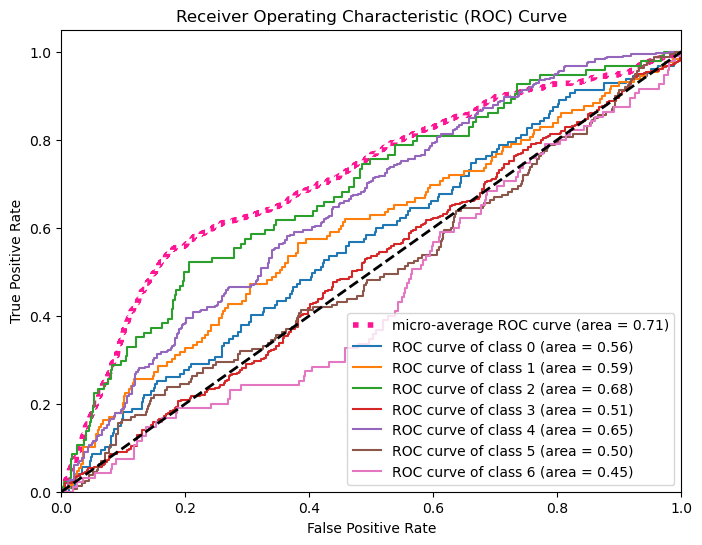

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Get model predictions
y_pred = alexnet_model.predict(X_val)

# 2. Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Compute confusion matrix
genres= df.iloc[:,3:].columns.to_list()
y_true_labels = np.argmax(y_val, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# print("Confusion Matrix:")
# print(conf_matrix)


## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
7
[[0.047550421208143234, 0.09289487451314926, 0.02065187878906727, 0.36250588297843933, 0.2611669600009918, 0.16395363211631775, 0.051276370882987976]]
3 0.36250588297843933 Drama
4 0.2611669600009918 Comedy
5 0.16395363211631775 Romance


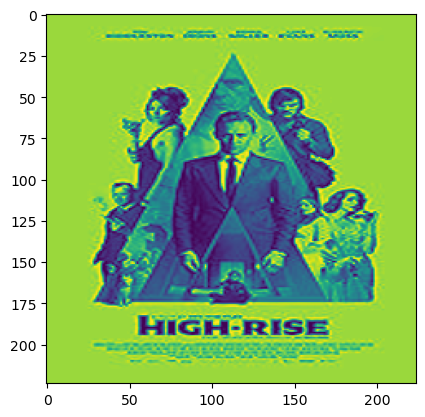

In [35]:
file1=r'https://movies.universalpictures.com/media/opr-tsr1sheet3-look2-rgb-3-1-1-64545c0d15f1e-1.jpg'
file=r'https://www.kenosha.com/wp-content/uploads/2023/08/et00072466-jjadjvahwx-landscape-copy.png'
file3=r'https://m.media-amazon.com/images/M/MV5BMjM3MjM4NzMwMl5BMl5BanBnXkFtZTgwMTQ4MjUzODE@._V1_UY209_CR0,0,140,209_AL_.jpg'
file2=r'https://theobjectivestandard.com/wp-content/uploads/2022/03/3-Idiots-Written-and-Directed-by-Rajkumar-Hirani-2048x1216.jpg'
genres= df.iloc[:,3:].columns.to_list()
preprocessed_image = preprocess_image(file3)
show(preprocessed_image.reshape(224,224))
#expanded_array = np.expand_dims(preprocessed_image, axis=1)
preprocessed_image=np.expand_dims(preprocessed_image, axis=1)
predictions = alexnet_model.predict(preprocessed_image)
predictions=predictions.tolist()
classes=[]
for x in predictions:
    for y in x:
        classes.append(y)
print(len(classes))
i=0
print(predictions)
while i!=3:
    print(classes.index(max(classes)), max(classes), genres[classes.index(max(classes))])
    classes[classes.index(max(classes))]= -1000
    i+=1